<a href="https://colab.research.google.com/github/Puneetrai004/100-Days-of-Machine-Learning/blob/main/Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np #linear algebra
import pandas as pd #data preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('Social_Network_Ads.csv')

In [64]:
df = df.iloc[:,2:]

In [65]:
df.sample(5)

,Age,EstimatedSalary,Purchased
123,35,53000,0
137,30,107000,1
6,27,84000,0
67,23,82000,0
39,27,31000,0


**TRAIN TEST SPLIT**

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

**STANDARD SCALAR**

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fit the scaler to the train segt, it will learn the parameters
scaler.fit(X_train)

#transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
scaler.mean_
X_train_scaled #X_train scaled is numpy arrays so we have to change to DataFrame(Scaled/transformed)

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [69]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [70]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [71]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


**EFFECT OF SCALING**

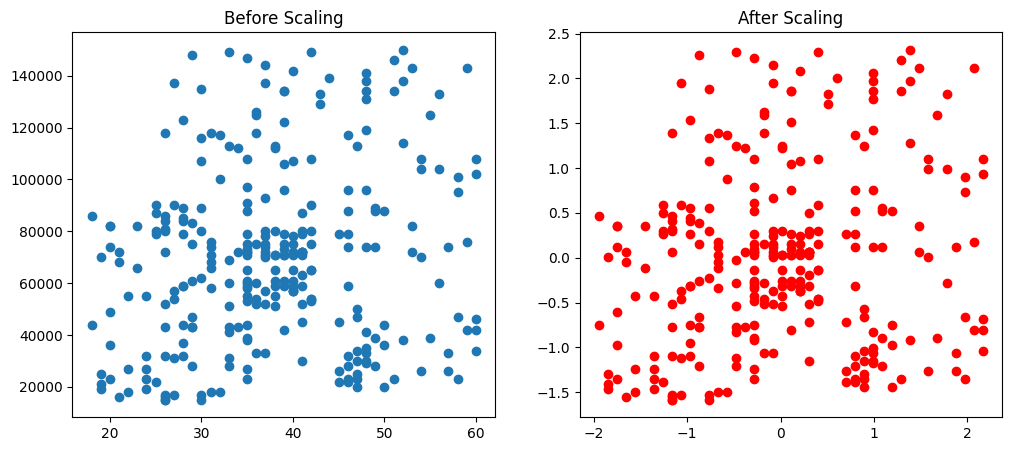

In [72]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color = 'red')
ax2.set_title("After Scaling")
plt.show()

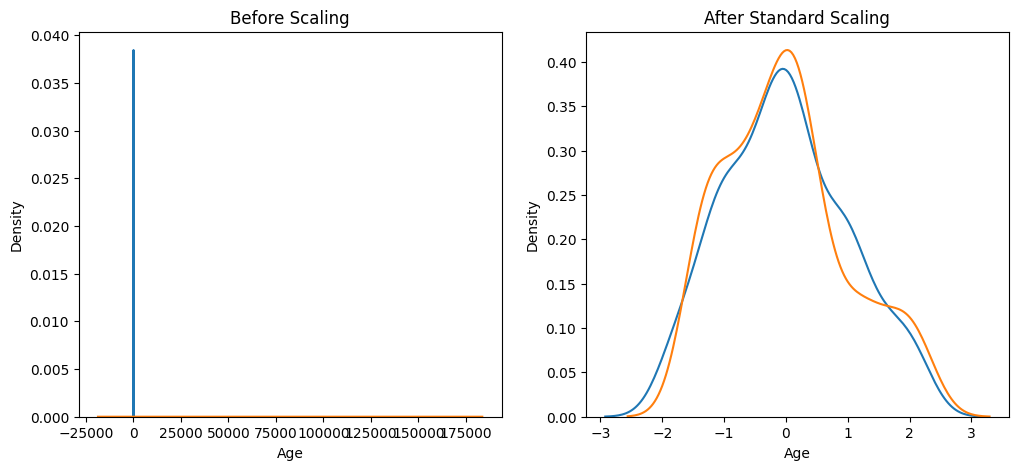

In [74]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12, 5))

#before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

#after scaling
ax2.set_title("After Standard Scaling")
sns.kdeplot(X_train_scaled['Age'], ax = ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax2)
plt.show()

**COMPARISON OF DISTRIBUTIONS**

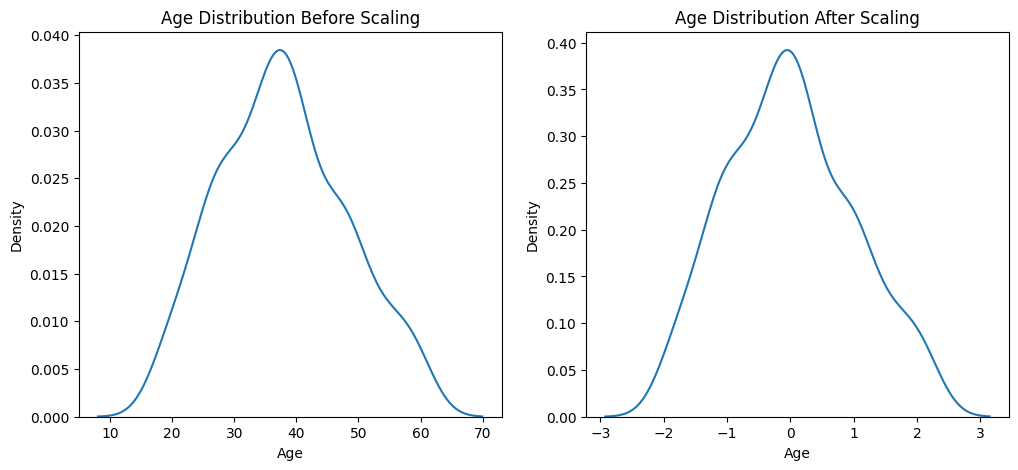

In [75]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

#Before Scaling
ax1.set_title("Age Distribution Before Scaling")
sns.kdeplot(X_train['Age'], ax = ax1)

#After Scaling
ax2.set_title("Age Distribution After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

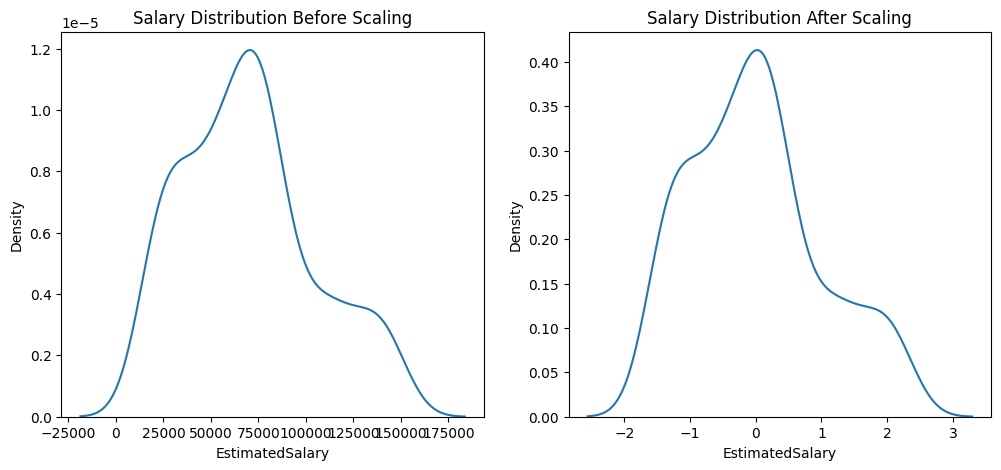

In [76]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

#Before Scaling
ax1.set_title("Salary Distribution Before Scaling")
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

#After Scaling
ax2.set_title("Salary Distribution After Scaling")
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

**WHY SCALING IS IMPORTANT?**

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [79]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [80]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [85]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [86]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [87]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.875
Scaled 0.875


In [88]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


**EFFECT OF OULIER**

In [89]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

<ipython-input-89-7966e07e892a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


In [90]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


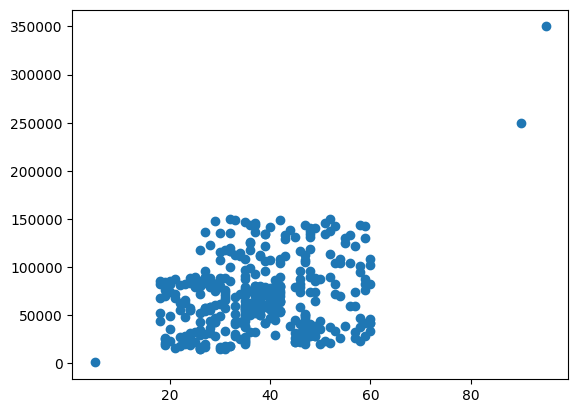

In [91]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size = 0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((282, 2), (121, 2))

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

#tranform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled =  pd.DataFrame(X_test_scaled, columns = X_test.columns)

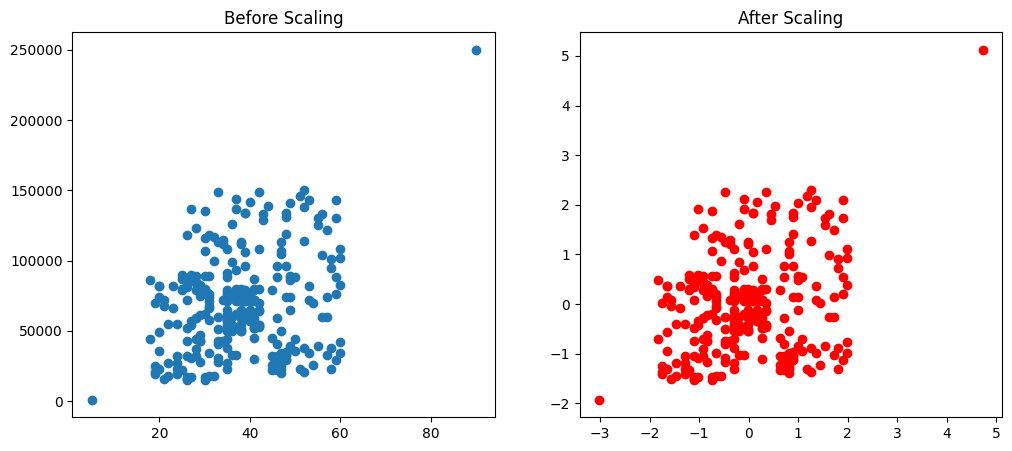

In [95]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()